In [ ]:
"""
PIA Inteligencia Artificial y Redes Convolucionales

Ing. Daniel Isaias Lopez Paez

Horario: N4-N6

Miembros:
- Raul Cristian Penilla Alanis 2014341
- León Jose Rivera Lopez 2013653
"""

In [ ]:
# Subir y descomprimir los datos.

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: images/apple fruit/Image_1.jpg  
  inflating: images/apple fruit/Image_10.jpg  
  inflating: images/apple fruit/Image_11.jpg  
  inflating: images/apple fruit/Image_12.jpg  
  inflating: images/apple fruit/Image_13.png  
  inflating: images/apple fruit/Image_14.png  
  inflating: images/apple fruit/Image_15.jpg  
  inflating: images/apple fruit/Image_16.jpg  
  inflating: images/apple fruit/Image_17.jpeg  
  inflating: images/apple fruit/Image_18.jpg  
  inflating: images/apple fruit/Image_19.jpg  
  inflating: images/apple fruit/Image_2.jpg  
  inflating: images/apple fruit/Image_20.jpg  
  inflating: images/apple fruit/Image_21.jpg  
  inflating: images/apple fruit/Image_22.jpg  
  inflating: images/apple fruit/Image_23.png  
  inflating: images/apple fruit/Image_24.jpg  
  inflating: images/apple fruit/Image_25.jpg  
  inflating: images/apple fruit/Image_26.jpg  
  inflating: images/apple fruit/Image_27.jpg  
  inflating: images/apple fruit/Image_2

In [ ]:
# Importar librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import os
from matplotlib.image import imread
import random
import matplotlib.image as mpimg

In [4]:
tf.random.set_seed(5)

In [ ]:
# Argumentacion de datos 

In [5]:
datagen = ImageDataGenerator(rotation_range=10,
            rescale = 1./255,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
            zoom_range=0.1,
            shear_range=0.1,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest',
            validation_split=0.2  # set validation split to 20% 
            )

In [ ]:
# Dividir los datos en conjunto de entrenamiento y validacion 

In [6]:
trainimagedata = datagen.flow_from_directory("/content/images",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'training'
                                            )

testimagedata = datagen.flow_from_directory("/content/images",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'validation'
                                            )

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [7]:
trainimagedata.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8], dtype=int32)

In [8]:
trainimagedata.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

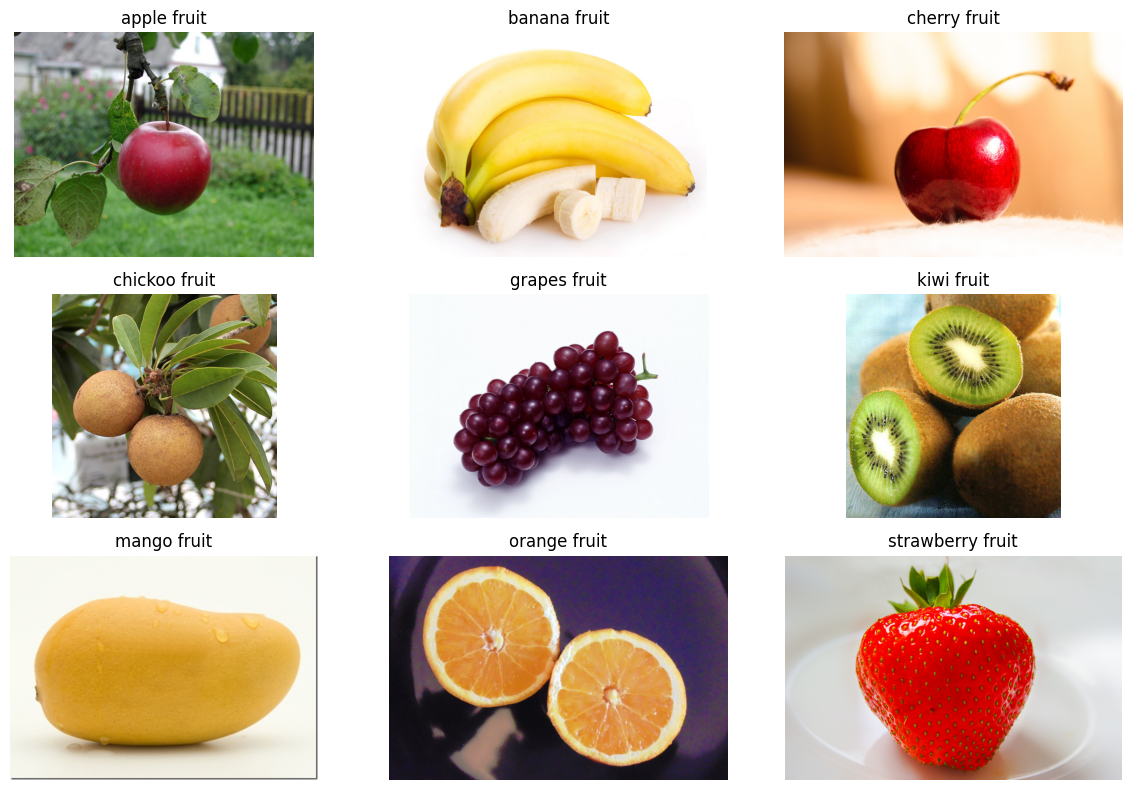

In [9]:
# Imprime un ejemplo de cada clase
# Direccion donde las imagenes estan guardadas
directory_path = '/content/images'

# Lista de clases
class_names = ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']

# Dar formato a las imagenes para mostrarlas
fig = plt.figure(figsize=(12, 8))

# Unir todas las clases
for i, class_name in enumerate(class_names):
    # Guardar la lista de imagenes en el directorio de clases
    class_directory = os.path.join(directory_path, class_name)
    image_files = os.listdir(class_directory)

    # Seleccionar una imagena aleatoria de los datos
    random_image = random.choice(image_files)
    image_path = os.path.join(class_directory, random_image)

    # Cargar y mostrar la imagen
    ax = fig.add_subplot(3, 3, i+1)
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

In [10]:
input_shape = trainimagedata.image_shape

In [11]:
# Arquitectura del modelo 
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3), input_shape = input_shape,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(9,activation = 'softmax'))

In [12]:
# Optimizar
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2 = 0.999, epsilon=1e-8)

In [13]:
# Compilar el modelo
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience =15)

In [15]:
# Ajustar el modelo 
mdl_history = model.fit(trainimagedata,
                          validation_data = testimagedata,
                          epochs=35,
                          batch_size=16,
                          callbacks=[early_stop])

Epoch 1/35
9/9 [==============================] - 27s 3s/step - loss: 2.2205 - accuracy: 0.1181 - val_loss: 2.1486 - val_accuracy: 0.2394
Epoch 2/35
9/9 [==============================] - 24s 3s/step - loss: 2.1171 - accuracy: 0.1528 - val_loss: 2.0170 - val_accuracy: 0.2676
Epoch 3/35
9/9 [==============================] - 25s 3s/step - loss: 2.0396 - accuracy: 0.2743 - val_loss: 1.9028 - val_accuracy: 0.3521
Epoch 4/35
9/9 [==============================] - 25s 3s/step - loss: 1.8991 - accuracy: 0.3438 - val_loss: 1.7206 - val_accuracy: 0.4507
Epoch 5/35
9/9 [==============================] - 24s 3s/step - loss: 1.7893 - accuracy: 0.3403 - val_loss: 1.6486 - val_accuracy: 0.3944
Epoch 6/35
9/9 [==============================] - 25s 3s/step - loss: 1.7078 - accuracy: 0.3472 - val_loss: 1.5232 - val_accuracy: 0.4789
Epoch 7/35
9/9 [==============================] - 24s 3s/step - loss: 1.5762 - accuracy: 0.3958 - val_loss: 1.4599 - val_accuracy: 0.4085
Epoch 8/35
9/9 [==================

In [16]:
# Mostrar arquitectura del modelo 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               9

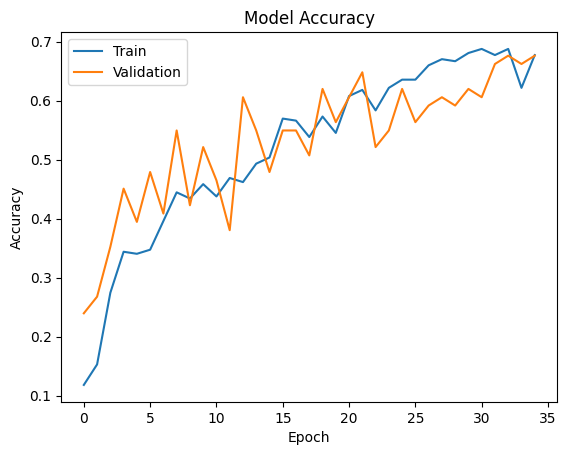

In [18]:
# Evaluar la exactitud del modelo
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
# Prediccion del modelo 
y_preds = model.predict(testimagedata)

3/3 [==============================] - 4s 1s/step


In [20]:
# Evaluacion del modelo
y_eva = model.evaluate(testimagedata)

3/3 [==============================] - 4s 811ms/step - loss: 1.0809 - accuracy: 0.6479


In [21]:
# Prediccion 1
# Haremos una prediccion para ver si es correcta (se selecciono una imagen de kiwi (5))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/kiwi fruit/Image_11.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [22]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 137ms/step


In [23]:
sample_pred = np.argmax(img_pred)


In [24]:
sample_pred

5

In [25]:
# Es correcta nuestra prediccion 

In [30]:
# Prediccion 2
# Haremos una prediccion para ver si es correcta (se selecciono una imagen de banana (1))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/banana fruit/Image_1.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [31]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 28ms/step


In [29]:
sample_pred = np.argmax(img_pred)

In [33]:
sample_pred

1

In [ ]:
# La prediccion es correcta 

In [34]:
# Prediccion 3
# Haremos una prediccion para ver si es correcta (se selecciono una imagen de apple (0))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/apple fruit/Image_24.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [35]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 23ms/step


In [36]:
sample_pred = np.argmax(img_pred)

In [37]:
sample_pred

0

In [ ]:
# La prediccion es correcta

In [38]:
# Prediccion 4
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de apple (0))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/apple fruit/Image_13.png",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [39]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 29ms/step


In [40]:
sample_pred = np.argmax(img_pred)

In [41]:
sample_pred

0

In [ ]:
# La prediccion es correcta

In [42]:
# Prediccion 5
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de cherry (2))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/cherry fruit/Image_11.jpeg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [43]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 24ms/step


In [44]:
sample_pred = np.argmax(img_pred)

In [45]:
sample_pred

2

In [ ]:
# La prediccion es correcta

In [46]:
# Prediccion 6
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de strawberry (8))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/strawberry fruit/Image_16.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [47]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 34ms/step


In [48]:
sample_pred = np.argmax(img_pred)

In [49]:
sample_pred

8

In [ ]:
# La prediccion es correcta

In [50]:
# Prediccion 7
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de mango (6))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/mango fruit/Image_20.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [51]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 35ms/step


In [52]:
sample_pred = np.argmax(img_pred)

In [53]:
sample_pred

6

In [ ]:
# La prediccion es correcta

In [54]:
# Prediccion 8
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de orange (7))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/orange fruit/Image_19.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [55]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 26ms/step


In [57]:
sample_pred = np.argmax(img_pred)

In [58]:
sample_pred

7

In [ ]:
# La prediccion es correcta

In [59]:
# Prediccion 9
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de grapes (4))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/grapes fruit/Image_30.jpeg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [60]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 27ms/step


In [61]:
sample_pred = np.argmax(img_pred)

In [62]:
sample_pred

4

In [ ]:
# La prediccion es correcta

In [63]:
# Prediccion 10
# Haremos una otra prediccion para ver si es correcta (se selecciono una imagen de chickoo (3))
from tensorflow.keras.preprocessing import image
new_image = image.load_img("/content/images/chickoo fruit/Image_40.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.

In [64]:
img_pred = model.predict(image_final)

1/1 [==============================] - 0s 39ms/step


In [65]:
sample_pred = np.argmax(img_pred)

In [66]:
sample_pred

3

In [ ]:
# La prediccion es correcta